CUSTOMER SEGMENTATION WITH RFM ANALYSIS

TASK - 1 
JUNE 12, 2025

RFM(RECENCY, FREQUENCY, MONETARY) Analysis is a marketing technique used for quantifying and evaluating customer behaviour. It segments customers based on their tranaction history - how recently and how often they purchased, and how much they spent.

Recency(R): It measures how recently a customer has made a purchase which indicates that the customer is active and more likely to buy again.

Frequency(F): This accesses how often a customer makes a purchase. Frequent buyers are more likely to continue purchasing in the future, indicating higher loyalty, satisfaction and engagement. While infrequent purchases suggests a need for re-engagement strategies.

Monetary(M): This evaluates how much money a customer has spent over time. This determines the customer's value to the business. High monetary customers contribute more to revenue, while lower spenders may require targeted strategies to increase their purchasing activity.


IMPORTANCE OF RFM IN BUSINESS STRATEGIES
By integrating RFM analysis into business strategies, companies can:

a. Optimize Marketing Campaigns: RFM analysis can drive more effective marketing campaigns by targeting the right customers with the right message at the right time.
b. Improve Customer Service: Understanding different segments helps in tailoring customer service efforts to meet the specific needs and preferences of each group.
c. Increase Customer Loyalty: By focusing on customers who are more likely to make frequent and recent purchases, businesses can implement strategies to boost customer loyalty.
d. Identify Potential High-Value Customers: It helps in spotting customers with the potential to become high-value patrons based on their buying patterns.
e. Personalized Customer Engagement: It gives room for more personalized communications and offers, as customers are segmented based on their purchasing behaviour.

Importing libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Load dataset

In [49]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name = 'Year 2009-2010')
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name = 'Year 2010-2011')

In [50]:
print(df1)
df1.info()
print(df2)
df2.info()

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [51]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [52]:
print(df.shape)

(1067371, 8)


Drop duplicates

In [54]:
df = df.drop_duplicates()
print(df.shape)

(1033036, 8)


Checking null values or NaN

In [56]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [64]:
print(df[df['Customer ID'].isnull()])

        Invoice StockCode                     Description  Quantity  \
263      489464     21733                    85123a mixed       -96   
283      489463     71477                           short      -240   
284      489467    85123A                     21733 mixed      -192   
470      489521     21646                             NaN       -50   
577      489525    85226C       BLUE PULL BACK RACING CAR         1   
...         ...       ...                             ...       ...   
1066997  581498    85099B         JUMBO BAG RED RETROSPOT         5   
1066998  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
1066999  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
1067000  581498     85174               S/4 CACTI CANDLES         1   
1067001  581498       DOT                  DOTCOM POSTAGE         1   

                InvoiceDate    Price  Customer ID         Country  
263     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283     200

Calculating Total Sales

In [67]:
df = df[df['Quantity']>0]
df = df[df['Price']>0]

In [69]:
df['TotalSales'] = df['Quantity']*df['Price']
print(df['TotalSales'])

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: TotalSales, Length: 1007914, dtype: float64


Calculating RFM Metrics

Recency

In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

In [73]:
current_date = df['InvoiceDate'].max()
print(current_date)

2011-12-09 12:50:00


In [75]:
#df["Customer ID"] = df["Customer ID"].astype(int) 

In [77]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [79]:
import datetime as dt

#Recency
latest_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

In [90]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalSales': 'sum'
}).reset_index()
rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalSales': 'Monetary'
}, inplace = True)
print(rfm)

      Customer ID  Recency  Frequency  Monetary
0         12346.0      326         12  77556.46
1         12347.0        2          8   4921.53
2         12348.0       75          5   2019.40
3         12349.0       19          4   4428.69
4         12350.0      310          1    334.40
...           ...      ...        ...       ...
5873      18283.0        4         22   2664.90
5874      18284.0      432          1    461.68
5875      18285.0      661          1    427.00
5876      18286.0      477          2   1296.43
5877      18287.0       43          7   4182.99

[5878 rows x 4 columns]


Data visualisation

In [115]:
recency = (current_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
# Rename column name as Recency
recency.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
# Change the values to day format
recency_df = recency["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

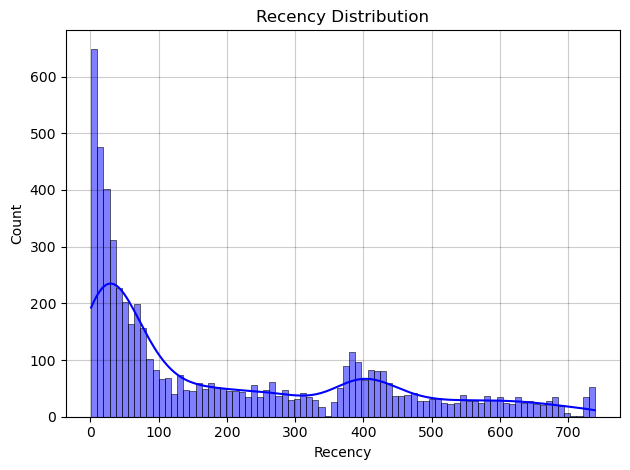

In [117]:
sns.histplot(rfm['Recency'], bins = 20, binwidth=9, kde=True, color='blue')
plt.title('Recency Distribution')
plt.grid(linestyle='-', alpha=0.2, color='black')
plt.tight_layout()
plt.show()

Frequency

In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

In [120]:
freq_df = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}) 
# Rename column name as Frequency
freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)
freq_df.head()

,Frequency
Customer ID,
12346.0,12
12347.0,8
12348.0,5
12349.0,4
12350.0,1


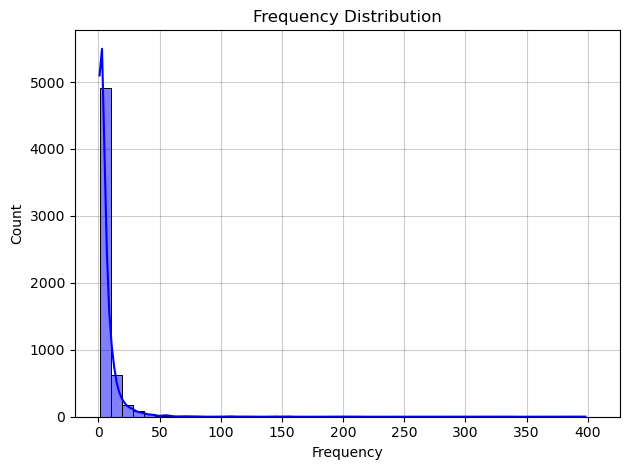

In [122]:
sns.histplot(rfm['Frequency'], bins = 20, binwidth=9, kde=True, color='blue')
plt.title('Frequency Distribution')
plt.grid(linestyle='-', alpha=0.2, color='black')
plt.tight_layout()
plt.show()

Monetary

In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases

In [127]:
monetary_df = df.groupby("Customer ID").agg({"TotalSales":"sum"})
# Rename Total Price column as Monetary
monetary_df.rename(columns={"TotalSales":"Monetary"}, inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12346.0,77556.46
12347.0,4921.53
12348.0,2019.40
12349.0,4428.69
12350.0,334.40


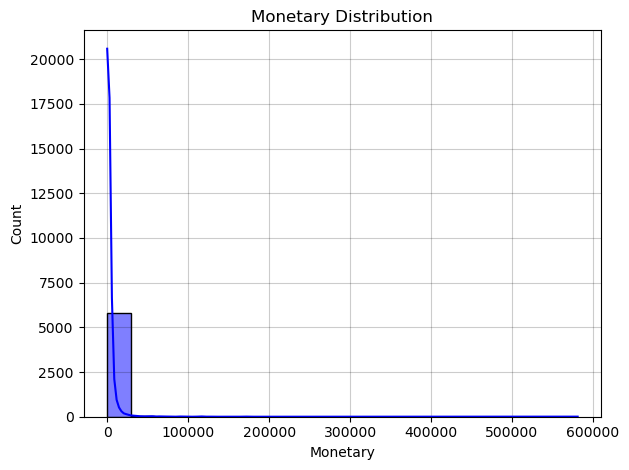

In [129]:
sns.histplot(rfm['Monetary'], bins = 20, kde=True, color='blue')
plt.title('Monetary Distribution')
plt.grid(linestyle='-', alpha=0.2, color='black')
plt.tight_layout()
plt.show()

In [ ]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

In [ ]:
# Dividing the recency values into recency scores such that the lowest recency value as 5 and the highest as 1
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1]) 
# Dividing the frequency values into frequency scores such that the lowest frequency value as 1 and the highest as 5
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# Dividing the monetary values into monetary scores such that the lowest monetary value as 1 and the highest as 5
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [ ]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonetaryScore'].astype(str))

In [ ]:
rfm[rfm["RFM_SCORE"]=="555"].head()

In [ ]:
rfm[rfm["RFM_SCORE"]=="111"].head()

Customer segmentation

In [ ]:
We will categorize the customers based on their RFM values into groups such as "Loyal Customers", "New Customers", "At-Risk Customers" and "Lost Customers".

1. Champions: Bought recently, buy often and spend the most.
2. Loyal Customers : These customers buy often and spend a lot. They are recent buyers, indicating ongoing engagement.
3. Potential Loyalists: Recent customers but spent a good amount and bought more than once.
4. Hibernating: Last purchases was long back, with low spenders and low number of orders.
5. Promising: Recent buyers but haven't spent much.
6. Need Attention: Above average recency, frequency and monetary values. May not have bought very recently though.
7. About to Sleep: Below average recency, frequency and monetary values. Will lose them if not reactivated.
8. New Customers: These are customers who have started buying recently but have not yet bought frequently or spent a lot.
9. At-Risk: These are customers who used to buy frequently and spend a significant amount, but it's been long time they purchased.
10. Can't Loose: Made biggest purchases and often. But haven't returned for a long time. 

In [ ]:
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
# Segments are changed with the definitons of seg_map
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [ ]:
rfm.head()

In [ ]:
# Mean, median, count statistics of different segments
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Data standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
print(rfm_scaled)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(type(rfm_scaled))
print(rfm_scaled[:5])

In [ ]:
print(rfm.head())

In [ ]:
print(rfm['Cluster'].value_counts().sort_index())

In [ ]:
new_rfm = rfm[["Recency", "Frequency", "Monetary", "Segment"]]

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'Segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

In [ ]:
import plotly.express as px
#Top 10 most preferred products
segments = new_rfm['Segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

In [ ]:
sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "Segment", y = "Frequency", data = new_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [ ]:
new_rfm[["Segment","Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count","sum"])

In [ ]:
Insights And Recommendations

Several marketing strategies can be determined for different customer segments. In this analysis, I have determined 3 strategies for different customer segments. These can be diversified and customers can be monitored more closely.

At Risk
1. Those in this group last shopping an average of 385 days ago. The group median was 369.340, so there was not much deviation from the mean. Therefore, it can be said that this number is consistent throughout the group.
2. On the other hand, on an average, 3.89 units of shopping were made and 1344.36 units of payments were made. The time interval that has passed since the last purchase of this group is very high, so customers may be lost. The reasons that may cause these people not to shop for so long should be focused on. That may caused by customer's dissatisfaction. The shopping experience of the customer can be examined by sending a survey via mail. If there is no such dissatisfaction, then the person is reminded. Options such as discount codes may be offered to encourage re-shopping.

Need Attention
1. People in this group last shopping, on average, 112 days ago. The group median is 266, so there is a huge deviation from the mean. This maybe a reason behind customer's preferences has not been met with the retailing services.
2. On average, 3.15 units of shopping were made and 1271.15 units of payment were made. Although there is a huge deviation, this group is less risky than the At-Risk group. By doing improvement over special offers, promotion and customer service, attention can be given to the customer's preferences so that they may come frequently.

About to sleep
1. Those in this group last shopping an average of 106 days ago. The group median was 385, that is a huge gap from the mean. Therefore, it can be said that this number is not consistent throughout the group.
2. On the other hand, on an average, 1.36 units of shopping were made and 552 units of payments were made. The time interval that has passed since the last purchase of this group is very high, so the connection between retailer and customers may be lost. Therefore, improvements regarding marketing strategies, actively promotional campaigns must be taken to resolve the communication gap.

Potential Loyalists

1. Those in this group last shopping an average of 24 days ago. The group median is 715, so there is a significant increasing relationship with the mean. Hence, this number is consistent across the group.
2. On average, 2.59 units were purchased and 1145.56 units were paid. People in this group can be included in the Loyal Customer group if supported. Therefore, they can be monitored closely and customer satisfaction can be increased with one-to-one phone calls. Apart from this, options such as champions, loyal customers can be offered to increase the average paid wages.